# Customer Churn Prediction Analysis

**Context:** The problem is to look at a churn prediction model for a Telecom customer. We started with understanding of the data presented, followed by a detailed exploratory analysis to look at the different data attributes, their domains, relationships etc. Feature engineering helps in identifying the key variables/set of variables in the context of churners, and help in identifying the ones that impact churning. A baseline model is arrived at based on a set of customer data which is trained further using additional data inputs. Finally the model is tested against the remaining set of data set aside for testing and validation. The resultant validated model is good to go for implementation on actual on-going data sets. 

## Exploratory Data Analysis

Diagrams and graphs are the best way to explore the data, the following plots provide some insghts about the features, their relation with each others, and with our target variable, "Churn".

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.display import IFrame
print("Telco Customer Churn Analysis")

Telco Customer Churn Analysis


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Importing Dataset

In [4]:
df = pd.read_csv("Churn_data.csv")
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
print(df.shape)

(7043, 21)


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Total charges is categorical, it should be changed to float.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df['TotalCharges'].fillna(0, inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Transform dependent variable to binaries.

In [10]:
lb_make = LabelEncoder()
df['Churn_Bi'] = lb_make.fit_transform(df["Churn"])
df[["Churn", "Churn_Bi"]].head()

,Churn,Churn_Bi
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


### Remove Churn and Customer ID from the dataset

In [11]:
dataset=df.drop('customerID', axis=1)
dataset=dataset.drop('Churn', axis=1)
print(dataset.shape)
dataset.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Bi
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Normalize Continuous variable

In [12]:
colToNorm = ('TotalCharges','MonthlyCharges','tenure')
subsetToNormalize = dataset[list(colToNorm)]
print(subsetToNormalize.shape)

(7043, 3)


In [13]:
subsetToKeep = dataset.drop(list(colToNorm), axis=1)

In [14]:
print(subsetToKeep.shape)

(7043, 17)


In [15]:
preObj = preprocessing.StandardScaler().fit(subsetToNormalize)
preObj

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
preObj.mean_
preObj.scale_

array([2266.63353863,   30.08791085,   24.55773742])

In [17]:
preObj = preObj.transform(subsetToNormalize)

In [18]:
preObj = pd.DataFrame(preObj, columns=list(('TotalCharges','MonthlyCharges','tenure')))
subsetToKeep = pd.DataFrame(subsetToKeep)

In [19]:
dataset = pd.concat([preObj.reset_index(drop=True), subsetToKeep.reset_index(drop=True)], axis=1)

### Creating Dummy Variables 

In [20]:
cat_vars=['gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

In [21]:
for var in cat_vars:
    cat_list='var' + '_' + var
    cat_list=pd.get_dummies(dataset[var],prefix=var)
    dataset_dum=dataset.join(cat_list)
    dataset=dataset_dum

In [22]:
dataset.columns

Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn_Bi', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupp

In [23]:
dataset_vars=dataset.columns.values.tolist()
to_keep=[i for i in dataset_vars if i not in cat_vars]

In [24]:
dataset_v2=dataset[to_keep]
dataset_v2.columns.values

array(['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn_Bi',
       'gender_Female', 'gender_Male', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Co

In [25]:
dataset_v2.shape

(7043, 47)

### Split, train and Test

In [26]:
X = dataset_v2.drop(['Churn_Bi'], axis=1)
y = dataset_v2[['Churn_Bi']]
dataset_v2.shape

(7043, 47)

In [27]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3457)

In [28]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train.values.ravel())

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = classifier.predict(X_test)
cf_mx = confusion_matrix(y_test, y_pred)
print(cf_mx)

[[917 105]
 [180 207]]


In [30]:
print('Score of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Score of logistic regression classifier on test set: 0.80


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1022
           1       0.66      0.53      0.59       387

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



We got 80% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.

## 3. Feature Engineering

### Importing Packages

In [32]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold # import KFold
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Importing Dataset

In [33]:
df = pd.read_csv("Churn_data.csv")
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Re-arranging features values
The following features are categorical where each one contains 3 values where 2 of them can be merged into one value. Foe example, in MultipleLines feature, it has values "yes", "No" and "No phone Service's". Therefore, the last two can be merged together as "No".

In [35]:
df['MultipleLines']=df['MultipleLines'].replace(['No phone service'], 'No')
df['OnlineSecurity']=df['OnlineSecurity'].replace(['No internet service'], 'No')
df['OnlineBackup']=df['OnlineBackup'].replace(['No internet service'], 'No')
df['DeviceProtection']=df['DeviceProtection'].replace(['No internet service'], 'No')
df['TechSupport']=df['TechSupport'].replace(['No internet service'], 'No')
df['StreamingTV']=df['StreamingTV'].replace(['No internet service'], 'No')
df['StreamingMovies']=df['StreamingMovies'].replace(['No internet service'], 'No')

### Converting Fields to Binaries
Payment Method, Contract and Internet Service are a features with categorical values that have no notion or sense of order. Therefore, we need to transform them into a more representative numerical form at which it can be easily understood by downstream code and pipeline.

In [36]:
df['PaymentMethod_echeck'] = np.where(df['PaymentMethod'] == "Electronic check",1,0)
df['PaymentMethod_Mailed'] = np.where(df['PaymentMethod'] == "Mailed check",1,0)
df['PaymentMethod_Transfer'] = np.where(df['PaymentMethod'] == "Bank transfer (automatic)",1,0)
df['PaymentMethod_Crdt'] = np.where(df['PaymentMethod'] == "Credit card (automatic)",1,0)

In [37]:
df['MonthlyContract'] = np.where(df['Contract'] == "Month-to-month",1,0)
df['OneYearContract'] = np.where(df['Contract'] == "One year",1,0)
df['TwoYearContract'] = np.where(df['Contract'] == "Two year",1,0)

In [38]:
df['InternetService_No'] = np.where(df['InternetService'] == "No",0,0)
df['InternetService_Fibre'] = np.where(df['InternetService'] == "Fiber optic",1,0)
df['InternetService_DSL'] = np.where(df['InternetService'] == "DSL",1,0)

Converting the other categorical variables to binaries. This is needed to make sure that they will be easily understoor and transformed by the different model algorithems

In [39]:
lb_make = LabelEncoder()
df['Churn'] = lb_make.fit_transform(df["Churn"])
df['MultipleLines'] = lb_make.fit_transform(df["MultipleLines"])
df['OnlineSecurity'] = lb_make.fit_transform(df["OnlineSecurity"])
df['gender'] = lb_make.fit_transform(df["gender"])
df['SeniorCitizen'] = lb_make.fit_transform(df["SeniorCitizen"])
df['Partner'] = lb_make.fit_transform(df["Partner"])
df['Dependents'] = lb_make.fit_transform(df["Dependents"])
df['PhoneService'] = lb_make.fit_transform(df["PhoneService"])
df['OnlineBackup'] = lb_make.fit_transform(df["OnlineBackup"])
df['DeviceProtection'] = lb_make.fit_transform(df["DeviceProtection"])
df['TechSupport'] = lb_make.fit_transform(df["TechSupport"])
df['StreamingTV'] = lb_make.fit_transform(df["StreamingTV"])
df['StreamingMovies'] = lb_make.fit_transform(df["StreamingMovies"])
df['PaperlessBilling'] = lb_make.fit_transform(df["PaperlessBilling"])

Dropping old features, InternetService, Contract and PaymentMethods

In [40]:
dataset0=df.drop('InternetService', axis=1)
dataset0 = dataset0.drop('Contract',axis=1)
dataset0 = dataset0.drop('PaymentMethod',axis=1)
dataset0 = dataset0.drop('customerID',axis=1)

Converting total charges to float, and replacing NA's with zero's

In [41]:
dataset0['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
dataset0['TotalCharges'].fillna(0, inplace=True)

In [42]:
dataset0.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_echeck', 'PaymentMethod_Mailed',
       'PaymentMethod_Transfer', 'PaymentMethod_Crdt', 'MonthlyContract',
       'OneYearContract', 'TwoYearContract', 'InternetService_No',
       'InternetService_Fibre', 'InternetService_DSL'],
      dtype='object')

In [43]:
dataset0.shape

(7043, 27)

In [44]:
dataset0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
gender                    7043 non-null int32
SeniorCitizen             7043 non-null int64
Partner                   7043 non-null int32
Dependents                7043 non-null int32
tenure                    7043 non-null int64
PhoneService              7043 non-null int32
MultipleLines             7043 non-null int32
OnlineSecurity            7043 non-null int32
OnlineBackup              7043 non-null int32
DeviceProtection          7043 non-null int32
TechSupport               7043 non-null int32
StreamingTV               7043 non-null int32
StreamingMovies           7043 non-null int32
PaperlessBilling          7043 non-null int32
MonthlyCharges            7043 non-null float64
TotalCharges              7043 non-null float64
Churn                     7043 non-null int32
PaymentMethod_echeck      7043 non-null int32
PaymentMethod_Mailed      7043 non-null int32
PaymentMethod_T

### Balancing Dataset
Looking for the dataset balance in term of the Churner's, we can find that the data is not balanced, as the churnners around 25% while the rest dont. Therefore, will do a bootstrap through SMOTE function in Imblearn package.

In [45]:
import imblearn
from imblearn.over_sampling import SMOTE
X = dataset0.loc[:, dataset0.columns != 'Churn']
y = dataset0.loc[:, dataset0.columns == 'Churn']
y=pd.DataFrame(y)
os = SMOTE(random_state=0)
columns = X.columns
os_data_X,os_data_y=os.fit_sample(X, y.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

In [46]:
print("length of oversampled data is ",len(os_data_X))
print("Number of No Churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of Churn",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is  10348
Number of No Churn in oversampled data 5174
Number of Churn 5174
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [47]:
os_data_Xy = pd.concat([os_data_X.reset_index(drop=True), os_data_y.reset_index(drop=True)], axis=1)

### Features Construction
Creating new feature based on a clustering between certain features might add a value toward the final model accuracy, where the target is to find a kind of grouping that split the records according to their churn status. Hence, we will use the K-Mode which is targeting categorical kind of features.

In [48]:
os_data_Xy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_echeck', 'PaymentMethod_Mailed',
       'PaymentMethod_Transfer', 'PaymentMethod_Crdt', 'MonthlyContract',
       'OneYearContract', 'TwoYearContract', 'InternetService_No',
       'InternetService_Fibre', 'InternetService_DSL', 'Churn'],
      dtype='object')

In [49]:
os_data_Xy.shape

(10348, 27)

In [50]:
colToCluster = ('InternetService_Fibre','MonthlyContract','OneYearContract', 'TwoYearContract', 'Churn')

In [51]:
subset4Cluster = os_data_Xy[list(colToCluster)]

In [52]:
from scipy import sparse
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.externals.joblib import Parallel, delayed
from sklearn.utils import check_random_state
from sklearn.utils.validation import check_array

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [53]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [54]:
from kmodes import kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [55]:
km = kmodes.KModes(n_clusters=6, init='Cao', n_init=5, verbose=0)

In [56]:
clusters = km.fit_predict(subset4Cluster)

In [57]:
subset4Cluster=pd.DataFrame(subset4Cluster)

In [58]:
subset4Cluster['clusters'] = clusters

In [59]:
ct = pd.crosstab(subset4Cluster['clusters'], subset4Cluster['Churn'])

In [60]:
print(ct)

Churn        0     1
clusters            
0          966  4977
1         1307    89
2         1647    18
3         1254     0
4            0    76
5            0    14


From the above table, we can find that groups 3,4 and 5 sharply split the data in referrence to the Churn. 

### Features Selection
The dataset includes both categorical and nuemerical variables, the following code from sklearn package will classify the features according to their importance, "True" will be considered as an important feature, while the opposite is the "False".

In [61]:
os_data_Xy['clusters']=clusters

In [62]:
def feature_sel(dataset,model,nb_feat):
    model = LogisticRegression()
    rfe = RFE(model, nb_feat)
    #os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])
    os_data_y=dataset.loc[:, dataset.columns == 'Churn']
    os_data_X=dataset.loc[:, dataset.columns != 'Churn']
    rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
    final_vars=os_data_X.columns.values.tolist()
    j=0
    final_list=[]
    for i in final_vars:
        if rfe.support_[j] == True :
            #print(list_2[j])
            final_list.append(i)    
        j = j + 1
    return final_list

Build a function for Classifications model

In [63]:
def run_model(X_f,y_f,model, alg_name, plot_index):
    #X_f = dataset_f.loc[:, dataset_f.columns != 'Churn']
    #y_f = dataset_f.loc[:, dataset_f.columns == 'Churn']
    X_train_f, X_test_f, y_train_f,y_test_f = train_test_split(X_f,y_f,test_size=0.2,random_state=3457)
    model.fit(X_train_f, y_train_f.values.ravel())
    
    if alg_name == "Logistic Regression":
        THRESHOLD = 0.4
        y_pred_f = np.where(model.predict_proba(X_test_f)[:,1] > THRESHOLD, 1, 0)
    else :
        y_pred_f = model.predict(X_test_f)
    #print('Score of ' + alg_name + ' on test set: {:.4f}'.format(model.score(X_test_f, y_test_f)))
    score_f= model.score(X_test_f, y_test_f)
    cf_mx1_f = confusion_matrix(y_test_f, y_pred_f)
    #print(cf_mx1_f)
    True_Pred_f = cf_mx1_f[0][0] + cf_mx1_f[1][1]
    Total_Pred_f = cf_mx1_f[0][0] + cf_mx1_f[1][1] + cf_mx1_f[0][1] + cf_mx1_f[1][0]
    acc= True_Pred_f/Total_Pred_f
    #print('Accuracy of ' + alg_name + ' on test set: {:.4f}'.format(acc))
    return score_f,acc

**Backup Data Set**

In [64]:
#from copy import deepcopy
#os_data_X1 = deepcopy(os_data_X)
#os_data_y1 = deepcopy(os_data_y)

In [65]:
from sklearn.feature_selection import RFE

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Select number of features based on accuracy

In [67]:
alg_name = "Logistic Regression"
model = LogisticRegression(random_state=3457)
score_l=[]
acc_l=[]
for i in range(3,10):
    final_list=feature_sel(os_data_Xy,model,i)
    os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
    os_data_X=os_data_Xy[final_list]
    #final_list
    score_f,acc_f = run_model(os_data_X,os_data_y,model, "Logistic Regression", 2)
    score_l.append(score_f)
    acc_l.append(acc_f)
    ind_score= score_l.index(max(score_l))
    
print('Number of feature:' + str(ind_score+3))
print('Score of ' + alg_name + ' on test set: {:.4f}'.format(score_l[ind_score]))
print('Accuracy of ' + alg_name + ' on test set: {:.4f}'.format(acc_l[ind_score]))
final_list=feature_sel(os_data_Xy,model,ind_score+3)
final_list
os_data_lg_X=os_data_X[final_list]

Number of feature:4
Score of Logistic Regression on test set: 0.8778
Accuracy of Logistic Regression on test set: 0.8802


# Logistic Regression with a L1 penalty

### Select number of features based on accuracy

In [68]:
model = LogisticRegression(random_state=3457,C=0.01, penalty='l1', tol=0.01, solver='liblinear')
alg_name = "Logistic Regression"
#model_lg = LogisticRegression(random_state=3457)
score_l=[]
acc_l=[]
for i in range(3,10):
    final_list=feature_sel(os_data_Xy,model,i)
    os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
    os_data_X=os_data_Xy[final_list]
    #final_list
    score_f,acc_f = run_model(os_data_X,os_data_y,model, "Logistic Regression", 2)
    score_l.append(score_f)
    acc_l.append(acc_f)
    ind_score= score_l.index(max(score_l))
    
print('Number of feature:' + str(ind_score+3))
print('Score of ' + alg_name + ' on test set: {:.4f}'.format(score_l[ind_score]))
print('Accuracy of ' + alg_name + ' on test set: {:.4f}'.format(acc_l[ind_score]))
final_list=feature_sel(os_data_Xy,model,ind_score+3)
final_list
os_data_lgL1_X=os_data_X[final_list]

Number of feature:9
Score of Logistic Regression on test set: 0.8874
Accuracy of Logistic Regression on test set: 0.8899


# Random Forest

### Select number of features based on accuracy

In [69]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d

C:\Users\sam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  


In [70]:
alg_name = "Random Forest"
model = RandomForestClassifier(random_state=3457)
score_l=[]
acc_l=[]
for i in range(3,10):
    final_list=feature_sel(os_data_Xy,model,i)
    os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
    os_data_X=os_data_Xy[final_list]
    #final_list
    score_f,acc_f = run_model(os_data_X,os_data_y,model, alg_name, 2)
    score_l.append(score_f)
    acc_l.append(acc_f)
    ind_score= score_l.index(max(score_l))
    
print('Number of feature:' + str(ind_score+3))
print('Score of ' + alg_name + ' on test set: {:.4f}'.format(score_l[ind_score]))
print('Accuracy of ' + alg_name + ' on test set: {:.4f}'.format(acc_l[ind_score]))
final_list=feature_sel(os_data_Xy,model,ind_score+3)
final_list
os_data_rf_X=os_data_X[final_list]

Number of feature:9
Score of Random Forest on test set: 0.9116
Accuracy of Random Forest on test set: 0.9116


### Print Features importance

In [71]:
final_list=feature_sel(os_data_Xy,model,9)
os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
os_data_X=os_data_Xy[final_list]
#final_list
score_f,acc_f = run_model(os_data_X,os_data_y,model, alg_name, 2)
print(model.feature_importances_)

[0.02487493 0.01760484 0.03186579 0.06933337 0.17973428 0.01241699
 0.04608406 0.01595728 0.60212845]


# Decision Tree

### Select number of features based on accuracy

In [72]:
from sklearn import tree

In [73]:
alg_name = "Decision Tree"
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=3458)
score_l=[]
acc_l=[]
for i in range(3,10):
    final_list=feature_sel(os_data_Xy,model,i)
    os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
    os_data_X=os_data_Xy[final_list]
    #final_list
    score_f,acc_f = run_model(os_data_X,os_data_y,model, alg_name, 2)
    score_l.append(score_f)
    acc_l.append(acc_f)
    ind_score= score_l.index(max(score_l))
    
print('Number of feature:' + str(ind_score+3))
print('Score of ' + alg_name + ' on test set: {:.4f}'.format(score_l[ind_score]))
print('Accuracy of ' + alg_name + ' on test set: {:.4f}'.format(acc_l[ind_score]))
final_list=feature_sel(os_data_Xy,model,ind_score+3)
final_list
os_data_dt_X=os_data_X[final_list]

Number of feature:3
Score of Decision Tree on test set: 0.8952
Accuracy of Decision Tree on test set: 0.8952


### Print Features importance

In [74]:
final_list=feature_sel(os_data_Xy,model,3)
os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
os_data_X=os_data_Xy[final_list]
#final_list
score_f,acc_f = run_model(os_data_X,os_data_y,model, alg_name, 2)
print(model.feature_importances_)

[0.02661293 0.05497896 0.9184081 ]


In [75]:
 X_train, X_test, y_train,y_test = train_test_split(os_data_dt_X,os_data_y,test_size=0.2,random_state=3457)

In [76]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5,random_state=3457,max_depth=4)
model.fit(X_train, y_train.values.ravel())

estimator = model.estimators_[4]
y_pred = model.predict(X_test)
print('Score of  on test set: {:.4f}'.format(model.score(X_test, y_test)))
cf_mx1_f = confusion_matrix(y_test, y_pred)
print(cf_mx1_f)
True_Pred_f = cf_mx1_f[0][0] + cf_mx1_f[1][1]
Total_Pred_f = cf_mx1_f[0][0] + cf_mx1_f[1][1] + cf_mx1_f[0][1] + cf_mx1_f[1][0]
acc= True_Pred_f/Total_Pred_f
print('Accuracy of on test set: {:.4f}'.format(acc))

Score of  on test set: 0.8952
[[ 816  195]
 [  22 1037]]
Accuracy of on test set: 0.8952


In [77]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = os_data_dt_X.columns,
                class_names = ['Churn','No Churn'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)



# xgboost

### Optimie number of features

In [80]:
from xgboost import XGBClassifier

#model_xg = XGBClassifier(random_state=3457)
#run_model(os_data_X,os_data_y,model_xg, "XGBoost", 4)

In [81]:
alg_name = "XGBoost"
model = XGBClassifier(random_state=3457)
score_l=[]
acc_l=[]
for i in range(3,10):
    final_list=feature_sel(os_data_Xy,model,i)
    os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
    os_data_X=os_data_Xy[final_list]
    #final_list
    score_f,acc_f = run_model(os_data_X,os_data_y,model, alg_name, 2)
    score_l.append(score_f)
    acc_l.append(acc_f)
    ind_score= score_l.index(max(score_l))
    
print('Number of feature:' + str(ind_score+3))
print('Score of ' + alg_name + ' on test set: {:.4f}'.format(score_l[ind_score]))
print('Accuracy of ' + alg_name + ' on test set: {:.4f}'.format(acc_l[ind_score]))
final_list=feature_sel(os_data_Xy,model,ind_score+3)
final_list
os_data_xg_X=os_data_X[final_list]

Number of feature:9
Score of XGBoost on test set: 0.9130
Accuracy of XGBoost on test set: 0.9130


# SVC

### Optimize number of features

In [82]:
from sklearn.svm import SVC

In [83]:
alg_name = "SVC"
model = SVC(random_state=3458)
score_l=[]
acc_l=[]
for i in range(3,10):
    final_list=feature_sel(os_data_Xy,model,i)
    os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
    os_data_X=os_data_Xy[final_list]
    #final_list
    score_f,acc_f = run_model(os_data_X,os_data_y,model, alg_name, 2)
    score_l.append(score_f)
    acc_l.append(acc_f)
    ind_score= score_l.index(max(score_l))
    
print('Number of feature:' + str(ind_score+3))
print('Score of ' + alg_name + ' on test set: {:.4f}'.format(score_l[ind_score]))
print('Accuracy of ' + alg_name + ' on test set: {:.4f}'.format(acc_l[ind_score]))
final_list=feature_sel(os_data_Xy,model,ind_score+3)
final_list
os_data_svc_X=os_data_X[final_list]

Number of feature:3
Score of SVC on test set: 0.8952
Accuracy of SVC on test set: 0.8952


# KNN

### Optimize number of Features

In [84]:
from sklearn import neighbors

In [85]:
alg_name = "KNN"
model = neighbors.KNeighborsClassifier()
score_l=[]
acc_l=[]
for i in range(3,10):
    final_list=feature_sel(os_data_Xy,model,i)
    os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']
    os_data_X=os_data_Xy[final_list]
    #final_list
    score_f,acc_f = run_model(os_data_X,os_data_y,model, alg_name, 2)
    score_l.append(score_f)
    acc_l.append(acc_f)
    ind_score= score_l.index(max(score_l))
    
print('Number of feature:' + str(ind_score+3))
print('Score of ' + alg_name + ' on test set: {:.4f}'.format(score_l[ind_score]))
print('Accuracy of ' + alg_name + ' on test set: {:.4f}'.format(acc_l[ind_score]))
final_list=feature_sel(os_data_Xy,model,ind_score+3)
final_list
os_data_knn_X=os_data_X[final_list]

Number of feature:9
Score of KNN on test set: 0.9077
Accuracy of KNN on test set: 0.9077


# Cross Validation


In [86]:
from scipy import interp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold # import KFold
#from sklearn.cross_validation import cross_val_score
import matplotlib.patches as patches

In [87]:
os_data_y=np.array(os_data_y)
c, r = os_data_y.shape
os_data_y = os_data_y.reshape(c,)

In [88]:
from sklearn.model_selection import cross_val_predict

#### 1- Cross Validation for Random Forest

In [89]:
os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']

In [90]:
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.model_selection  import cross_val_score, cross_val_predict

In [91]:
os_data_y=np.array(os_data_y)
c, r = os_data_y.shape
os_data_y = os_data_y.reshape(c,)

In [92]:
def cross_val_f(model,X,y):
    scores_f = cross_val_score(model,X, y, cv=3)
    #print ("Cross-validated scores for Random Forest:", scores_lg)
    print ("Accuracy: %0.2f (+/- %0.2f)" % (scores_f.mean(), scores_f.std() * 2))

In [93]:
model_rf = RandomForestClassifier(n_estimators=6,random_state=3457,max_depth=4,max_leaf_nodes=25)
cross_val_f(model_rf,os_data_rf_X,os_data_y)

Accuracy: 0.89 (+/- 0.04)


#### 2- Cross Validation for Random Logistic Regression

In [94]:
model_lg = LogisticRegression(random_state=3457)
cross_val_f(model_lg,os_data_lg_X,os_data_y)

Accuracy: 0.88 (+/- 0.01)


#### 3- Cross Validation for KNN 

In [95]:
model_knn = neighbors.KNeighborsClassifier()
cross_val_f(model_knn,os_data_knn_X,os_data_y)

Accuracy: 0.85 (+/- 0.20)


In [96]:
#### 4- Cross Validation for SVC

In [97]:
model_svc = SVC(C=1.0, degree=2,random_state=3458,kernel='rbf')
cross_val_f(model_svc,os_data_svc_X,os_data_y)

Accuracy: 0.90 (+/- 0.02)


#### 5- Cross Validation for XGBOOST

In [98]:
model_xg = XGBClassifier(random_state=3457)
cross_val_f(model_xg,os_data_xg_X,os_data_y)

Accuracy: 0.88 (+/- 0.12)


#### 6- Cross Validation for Logistic Regression

In [99]:

model_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=3458)
cross_val_f(model_dt,os_data_dt_X,os_data_y)

Accuracy: 0.90 (+/- 0.02)


#### 7- Cross Validation for Logistic Regression with L1

In [100]:
model_lgL1 = LogisticRegression(random_state=3457,C=0.1, penalty='l1', tol=0.1, solver='liblinear')
cross_val_f(model_lgL1,os_data_lgL1_X,os_data_y)

Accuracy: 0.87 (+/- 0.01)


## Print Confusion Matrix and Classification report for Decision Tree


In [101]:
#from sklearn.model_selection import cross_val_predict
y_pred= cross_val_predict(model_dt, os_data_dt_X, os_data_y, cv=3)
conf_mat = confusion_matrix(os_data_y, y_pred)
print(conf_mat)


[[4208  966]
 [ 107 5067]]


In [102]:
print(classification_report(os_data_y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5174
           1       0.84      0.98      0.90      5174

    accuracy                           0.90     10348
   macro avg       0.91      0.90      0.90     10348
weighted avg       0.91      0.90      0.90     10348



## Plot ROC


In [103]:
from sklearn.model_selection import StratifiedKFold
#clf = RandomForestClassifier(random_state=3457)
model_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=3458)
cv = StratifiedKFold(n_splits=5,shuffle=False)

In [104]:
X_train, X_test, y_train,y_test = train_test_split(os_data_dt_X,os_data_y,test_size=0.2,random_state=3457)

In [105]:
model_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=3458)

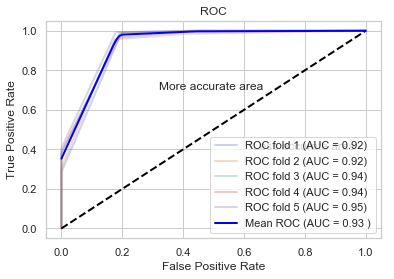

In [106]:
os_data_dt_X=pd.DataFrame(os_data_dt_X)
os_data_y=pd.DataFrame(os_data_y)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 101)
i = 1
for train,test in cv.split(os_data_dt_X,os_data_y):
    prediction = model_dt.fit(os_data_dt_X.iloc[train],os_data_y.iloc[train]).predict_proba(os_data_dt_X.iloc[test])
    fpr, tpr, t = roc_curve(os_data_y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## 5. Summary of the models

####  The following table represnts the summary of all models trained and tested. 
####  Hence, the metric proposed is the accuracy, and the best perofoming model founded is the RandomeForest.

In [107]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [108]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    #scores_xg = cross_val_score(model_xg,os_data_X, os_data_y, cv=3)
    predictions  = model.predict(testing_x)
    accuracy     = "{0:.4f}".format(accuracy_score(testing_y,predictions))
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)

    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [109]:
def model_report_cv(model,os_data_X, os_data_y,name) :
    
    y_pred= cross_val_predict(model, os_data_X, os_data_y, cv=3)
    accuracy = "{0:.4f}".format(cross_val_score(model,os_data_X, os_data_y, cv=3).mean())
    recallscore = recall_score(os_data_y, y_pred,average='weighted')
    precision     = precision_score(os_data_y, y_pred,average='weighted')
    roc_auc=roc_auc_score(os_data_y, y_pred,average='weighted')
    f1score=f1_score(os_data_y, y_pred,average='weighted')	 
    kappa_metric=cohen_kappa_score(os_data_y, y_pred)	
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [110]:
os_data_bX=dataset0.loc[:, dataset0.columns != 'Churn']
os_data_by=dataset0.loc[:, dataset0.columns == 'Churn']

In [111]:

os_data_y=os_data_Xy.loc[:, os_data_Xy.columns == 'Churn']

In [112]:
#Base Model

model_base = LogisticRegression(random_state=3457)
train_X, test_X, train_Y,test_Y = train_test_split(os_data_bX,os_data_by.values.ravel(),test_size=0.2,random_state=3457)
model1 = model_report(model_base,train_X,test_X,train_Y,test_Y,"Logistic Regression(BM)")
#model1 = model_report_cv(model_base,os_data_X,os_data_y,"Logistic Regression(BM)")

In [113]:
# Linear Regreassion

model_lg = LogisticRegression(random_state=3457)
train_X, test_X, train_Y,test_Y = train_test_split(os_data_lg_X,os_data_y.values.ravel(),test_size=0.2,random_state=3457)
model2 = model_report(model_lg,train_X,test_X,train_Y,test_Y,"Logistic Regression")
#model2 = model_report_cv(model_lg,os_data_lg_X,os_data_y.values.ravel(),"Logistic Regression")

In [114]:
model_lgL1 = LogisticRegression(random_state=3457,C=0.1, penalty='l1', tol=0.1, solver='liblinear')
#train_X, test_X, train_Y,test_Y = train_test_split(os_data_lgL1_X,os_data_y,test_size=0.2,random_state=3457)
#model3 = model_report(model_lgL1,train_X,test_X,train_Y,test_Y,"Logistic Regression(L1)")
model3 = model_report_cv(model_lgL1,os_data_lgL1_X,os_data_y.values.ravel(),"Logistic Regression(L1)")

In [115]:
#model_dt = RandomForestClassifier(n_estimators=6,random_state=3457,max_depth=4,max_leaf_nodes=25)
model_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=3457)
#model_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=3458,n_estimators=6)
#train_X, test_X, train_Y,test_Y = train_test_split(os_data_dt_X,os_data_y,test_size=0.2,random_state=3457)
#model4 = model_report(model_dt,train_X,test_X,train_Y,test_Y,"Decision Tree")
model4 = model_report_cv(model_dt,os_data_dt_X,os_data_y.values.ravel(),"Decision Tree")

In [116]:
model_rf = RandomForestClassifier(n_estimators=6,random_state=3457,max_depth=4,max_leaf_nodes=25)
#train_X, test_X, train_Y,test_Y = train_test_split(os_data_rf_X,os_data_y,test_size=0.2,random_state=3457)
#model5 = model_report(model_rf,train_X,test_X,train_Y,test_Y,"Random Forest")
model5 = model_report_cv(model_rf,os_data_rf_X,os_data_y.values.ravel(),"Random Forest")

In [117]:
model_xg = XGBClassifier(random_state=3457)
#train_X, test_X, train_Y,test_Y = train_test_split(os_data_xg_X,os_data_y,test_size=0.2,random_state=3457)
#model6 = model_report(model_xg,train_X,test_X,train_Y,test_Y,"XGBOOST")
model6 = model_report_cv(model_xg,os_data_xg_X,os_data_y.values.ravel(),"XGBOOST")

In [118]:
model_svc = SVC(C=0.01, degree=2,random_state=3457,kernel='rbf')
#train_X, test_X, train_Y,test_Y = train_test_split(os_data_svc_X,os_data_y,test_size=0.2,random_state=3457)
#model7 = model_report(model_svc,train_X,test_X,train_Y,test_Y,"SVC")
model7 = model_report_cv(model_svc,os_data_svc_X,os_data_y.values.ravel(),"SVC")

In [119]:
model_knn = neighbors.KNeighborsClassifier()
#train_X, test_X, train_Y,test_Y = train_test_split(os_data_knn_X,os_data_y,test_size=0.2,random_state=3457)
#model8 = model_report(model_knn,train_X,test_X,train_Y,test_Y,"KNN")
model8 = model_report_cv(model_knn,os_data_knn_X,os_data_y.values.ravel(),"KNN")


In [120]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


C:\Users\sam\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [121]:
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))
py.iplot(table)